# Profit vs Loss
Bonds: Low Risk and return.  
Stocks: Highr Risk, fluctuation and returns

## Calculating return of a single investment

### Las inversiones con diferentes periodos de tiempo no deberian compararse 

Simple rate of return:
$$
\frac{ending price - beginning price}{beginning price} = \frac{ending price}{beginning price} - 1
$$
*Es mejor usarlos cuando tenemos multiples activos en un mismo corte de tiempo*   

Logarithmic rate of return:
$$
log(\frac{ending price}{beginning price})
$$   
*Es mejor usar cuando tenemos un activo con un periodo largo de tiempo*   

### TimeFrame
annual return = [(daily return + 1)^365]*100 - 1


In [ ]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
PG = wb.DataReader('PG',data_source = 'yahoo', start = "2000-1-1")
PG

# Simple Return Example Daily
$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$
## pandas.DataFrame.shift( # of lags)


In [ ]:
PG['Simple-Return'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) -1
PG['Simple-Return']

In [ ]:
PG['Simple-Return'].plot(figsize=(18,5))
plt.show()

In [ ]:
avg_returns_d= PG['Simple-Return'].mean()
avg_returns_d

In [ ]:
avg_returns_a= PG['Simple-Return'].mean() * 250 #Debido a que las nogeciaciones no se hacen fds
avg_returns_a

In [ ]:
print (str(round(avg_returns_a,5) * 100)+ "%")

# Logarithmic Return Example Daily
$$
log(\frac{P_1}{P_0})
$$

In [ ]:
PG['Log-Prices']=np.log(PG['Adj Close'])
PG['Log-Prices']

In [ ]:
PG['Log-Return']=np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG['Log-Return'].plot(figsize =(18,5))

In [ ]:
avr_log_Returns = PG['Log-Return'].mean()*250
print (str(round(avr_log_Returns,5) * 100) + "%")

In [ ]:
del PG['Log-Prices']
PG

# Calculating return of multiple investment
## Calculating the rate of return of a portafolio
RP= rate of return for a security * weight in portafolio   
## Normalization 100
$$
\frac{P_t}{P_0} * 100 
$$

In [ ]:
tickets = ['AAPL','F', 'PFE','MSFT']

In [ ]:
stocks =pd.DataFrame()
for t in tickets:
    stocks[t]= wb.DataReader(t,data_source = 'yahoo', start = '2000-1-1')['Adj Close']
stocks.head()   

In [ ]:
stocks.plot(figsize=(15,5))

In [ ]:
#Normalizacion
(stocks / stocks.iloc[0] * 100).head()
(stocks / stocks.iloc[0] * 100).plot(figsize=(16,4))

In [ ]:
# Retornos
returns =(stocks/stocks.shift(1) -1).mean() * 250
returns

In [ ]:
weight =np.array([0.25,0.25,0.25,0.25])
weight

In [ ]:
print (str(round(np.dot(returns , weight)*100,5)) + "%")

# Market Index
Good proxy for the development of the market:   
S&P: 500 largest listed companies; Diverse constituency; Market Cap weighted   
Dow Jones: 30 large public stocks; One of the historically oldest indices   
NASDAQ: Grouped Securities: IT compnies; TECH Stocks

In [5]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [11]:
tickers = ["^GSPC","^IXIC", "^GDAXI"]
data = pd.DataFrame()
for t in tickers:
    data[t]= wb.DataReader(t, data_source='yahoo', start ='2000-1-1')['Adj Close']


In [12]:
data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-03-15,3968.939941,13459.709961,14461.419922
2021-03-16,3962.709961,13471.570312,14557.580078
2021-03-17,3974.120117,13525.200195,14596.610352
2021-03-18,3915.459961,13116.169922,14775.519531
2021-03-19,3913.100098,13215.240234,14621.000000


<AxesSubplot:xlabel='Date'>

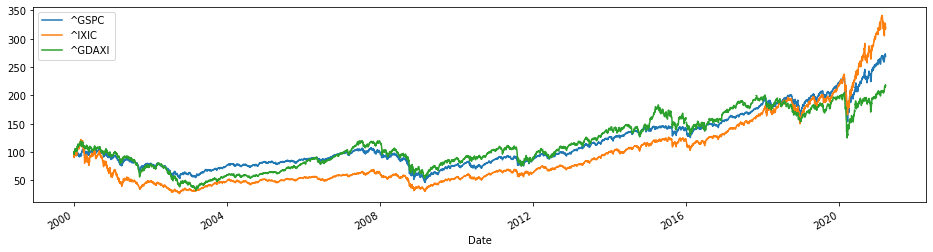

In [13]:
#Normalizacion
(data/data.iloc[0] * 100).plot(figsize=(16,4))


In [16]:
# Retornos Anuales Simples
avr_ind_ann=(data/data.shift(1) - 1).mean() * 250 *100
avr_ind_ann

^GSPC     6.595106
^IXIC     8.649801
^GDAXI    4.962437
dtype: float64

In [19]:
tickers = ["PG","^GSPC", "^DJI"]
data2 = pd.DataFrame()
for t in tickers:
    data2[t]= wb.DataReader(t, data_source='yahoo', start ='2000-1-1')['Adj Close']

<AxesSubplot:xlabel='Date'>

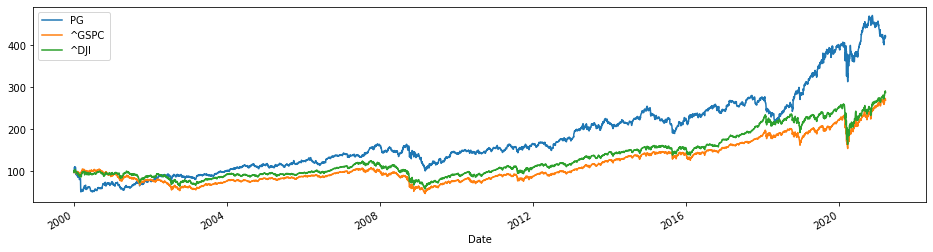

In [20]:
#Normalizacion
(data2/data2.iloc[0] * 100).plot(figsize=(16,4))